### Name : Prathamesh Rokade
### Branch : AIML - C
### Roll No : 57
### Machine Learning Practical 7

### Aim: A shopkeeper keeps records of his customers like age, gender, and annual income. Now, he wants to enhance his business by offering attractive deals. How should the shopkeeper provide these offers to his customers. Create machine learning model using Kmeans algorithm and help shopkeeper to identify group of customers.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('shop.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.shape

(200, 5)

In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Checking for null values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
features = df.drop(['CustomerID','Genre','Age'], axis = 1)
features.shape

(200, 2)

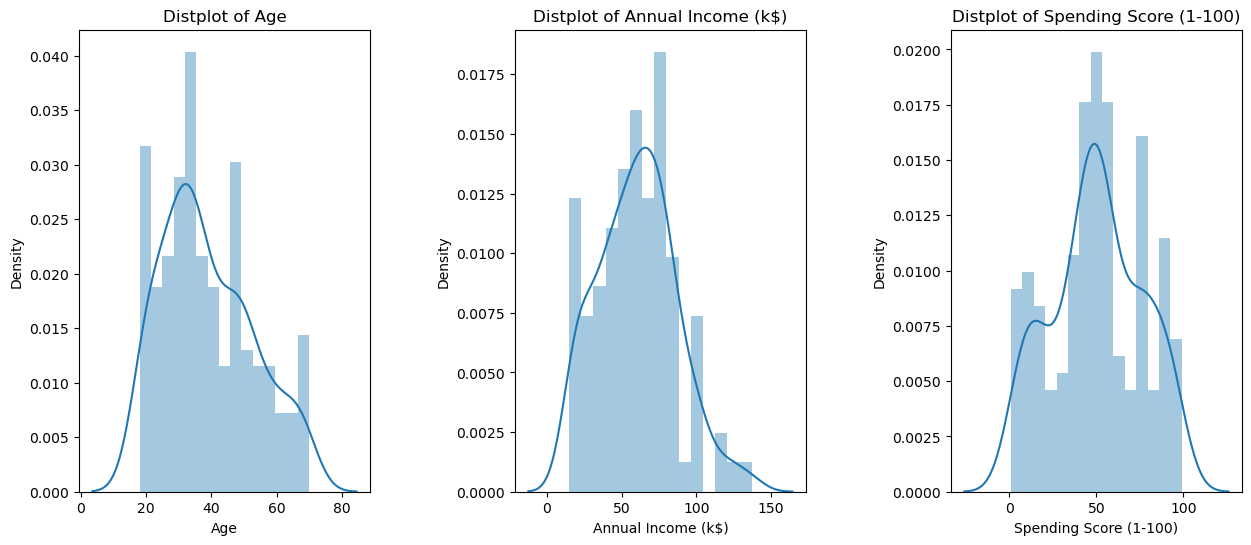

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [11]:
my_cluster_model = KMeans(n_clusters=2)

In [12]:
my_cluster_model.fit(features)

KMeans(n_clusters=2)

In [13]:
df['cluster'] = my_cluster_model.labels_

In [14]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [15]:
my_cluster_model.cluster_centers_

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

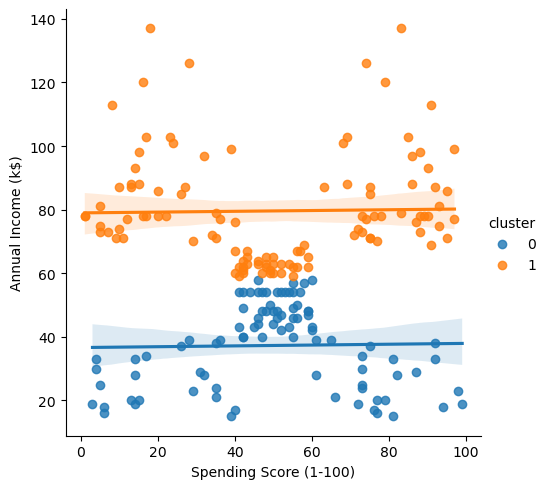

In [16]:
sns.lmplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=df, hue='cluster');
plt.show()

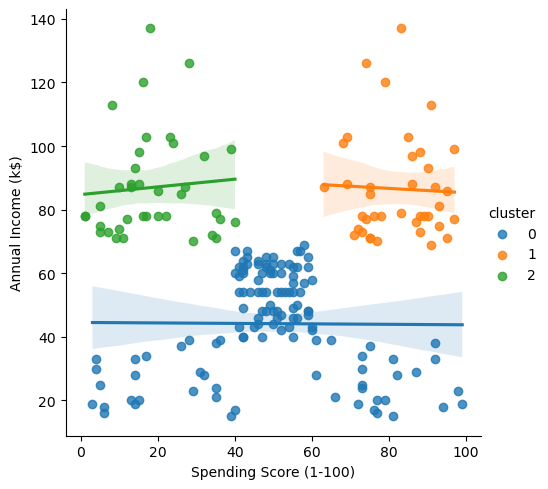

In [17]:
my_cluster_model = KMeans(n_clusters=3)
my_cluster_model.fit(features)
df['cluster'] = my_cluster_model.labels_
sns.lmplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=df, hue='cluster');
plt.show()

In [18]:

my_cluster_model.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

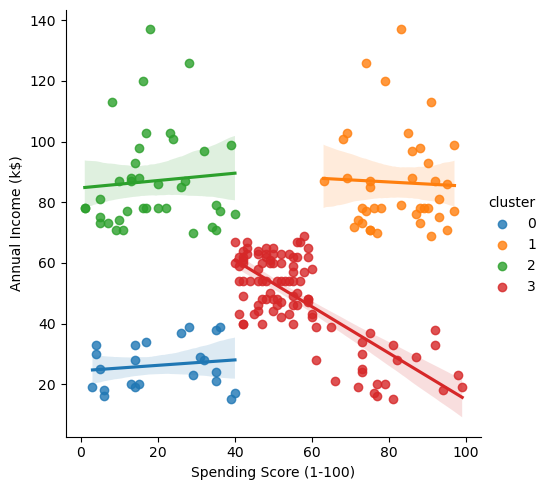

In [19]:
my_cluster_model = KMeans(n_clusters=4)
my_cluster_model.fit(features)
df['cluster'] = my_cluster_model.labels_
sns.lmplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=df, hue='cluster');
plt.show()

In [20]:
my_cluster_model.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895],
       [48.26      , 56.48      ]])

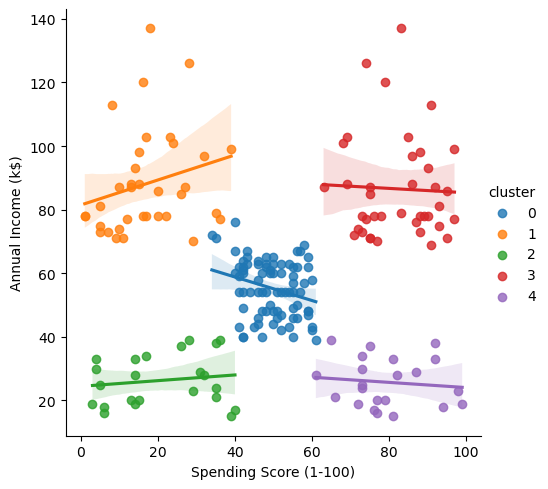

In [21]:
my_cluster_model = KMeans(n_clusters=5)
my_cluster_model.fit(features)
df['cluster'] = my_cluster_model.labels_
sns.lmplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=df, hue='cluster');
plt.show()

In [22]:
my_cluster_model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [23]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_) 

In [24]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37233.81451071001,
 30566.45113025186,
 25002.36169999416,
 21829.135638779822,
 20035.137783976068]

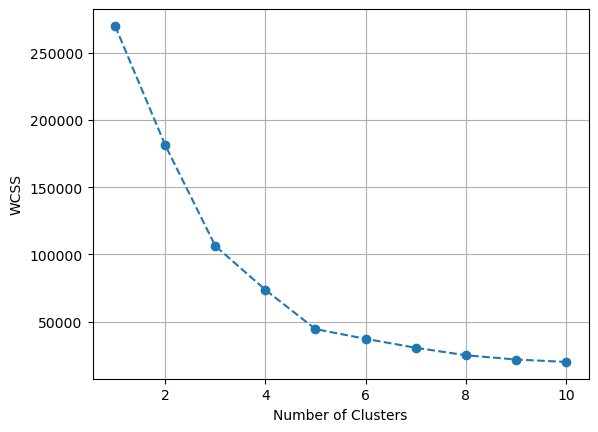

In [25]:
plt.plot(range(1,11),wcss,"o--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    my_cluster_model = KMeans(n_clusters=n_clusters)
    m = my_cluster_model.fit_predict(features)
    silhouette_avg = silhouette_score(features, m)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5379675585622219
